# Airbnb Price Prediction Challenge
## CMP461 - Big Data
### [Phase 2]
### Team no. 5
### Team members
- Khaled Amgad,
Section:1, B.N.:15
khaled.mohamed98@eng-st.cu.edu.eg 

- Mohamed Mokhtar,
Section:2, B.N.:17
mohamed.mahmoud98@eng-st.cu.edu.eg 

- Sofyan Mahmoud,
Section:1, B.N.:25
sofyan.alsayed98@eng-st.cu.edu.eg 

- Nour Nasser,
Section:2, B.N.:30
nour.mohamed98@eng-st.cu.edu.eg


# **Data Downloading**

In [5]:
# visit this first please
# https://www.kaggle.com/general/74235
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
#! kaggle datasets list

Saving kaggle.json to kaggle.json
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [6]:
!kaggle datasets download -d 'stevezhenghp/airbnb-price-prediction'
!unzip airbnb-price-prediction.zip -d data

 90% 28.0M/31.3M [00:00<00:00, 26.2MB/s]
100% 31.3M/31.3M [00:00<00:00, 53.2MB/s]
Archive:  airbnb-price-prediction.zip
  inflating: data/train.csv          


In [7]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['axes.titlesize'] = 24
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['lines.markersize'] = 10
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams["figure.figsize"] = '12', '8'
#plt.xticks(rotation=85)


# **Data Reading**

In [8]:
data = pd.read_csv("./data/train.csv")
data.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",2016-06-18,t,t,NaN,2012-03-26,f,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,2017-08-05,t,f,100%,2017-06-19,t,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,The Oasis comes complete with a full backyard ...,2017-04-30,t,t,100%,2016-10-25,t,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,This light-filled home-away-from-home is super...,NaN,t,t,NaN,2015-04-19,f,NaN,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,"Cool, cozy, and comfortable studio located in ...",2015-05-12,t,t,100%,2015-03-01,t,2017-01-22,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


# **Data Exploration and Visualization**

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [10]:
# Prinintg all unique values of the objects data types in the dataset
for column in data.columns:
  if (data[column].dtype) == 'object' and column != 'zipcode' and column != 'neighbourhood':  
    print(column,"\n--------------------------")
    print(data[column].unique())
    print("\n------------------------------")

property_type 
--------------------------
['Apartment' 'House' 'Condominium' 'Loft' 'Townhouse' 'Hostel'
 'Guest suite' 'Bed & Breakfast' 'Bungalow' 'Guesthouse' 'Dorm' 'Other'
 'Camper/RV' 'Villa' 'Boutique hotel' 'Timeshare' 'In-law' 'Boat'
 'Serviced apartment' 'Castle' 'Cabin' 'Treehouse' 'Tipi' 'Vacation home'
 'Tent' 'Hut' 'Casa particular' 'Chalet' 'Yurt' 'Earth House'
 'Parking Space' 'Train' 'Cave' 'Lighthouse' 'Island']

------------------------------
room_type 
--------------------------
['Entire home/apt' 'Private room' 'Shared room']

------------------------------
amenities 
--------------------------
['{"Wireless Internet","Air conditioning",Kitchen,Heating,"Family/kid friendly",Essentials,"Hair dryer",Iron,"translation missing: en.hosting_amenity_50"}'
 '{"Wireless Internet","Air conditioning",Kitchen,Heating,"Family/kid friendly",Washer,Dryer,"Smoke detector","Fire extinguisher",Essentials,Shampoo,Hangers,"Hair dryer",Iron,"translation missing: en.hosting_amenity_50"}'

In [11]:
def bar_plot_object(title,data):
  x = list(data.value_counts().keys())
  x = x[::-1]
  y = list(data.value_counts())
  y = y[::-1]
  plt.barh(x,y)
  plt.title(title)
  return None

In [12]:
def explore_col(column):
  bar_plot_object(column+" histogram",data[column])
  print(column,'description\n', data[column].describe())
  print('Top 5 frequent:',data[column].value_counts()[:5].index.tolist())

In [13]:
def pie_col(column):
  data[column].value_counts().plot.pie(autopct='%1.0f%%')

property_type description
 count         74111
unique           35
top       Apartment
freq          49003
Name: property_type, dtype: object
Top 5 frequent: ['Apartment', 'House', 'Condominium', 'Townhouse', 'Loft']


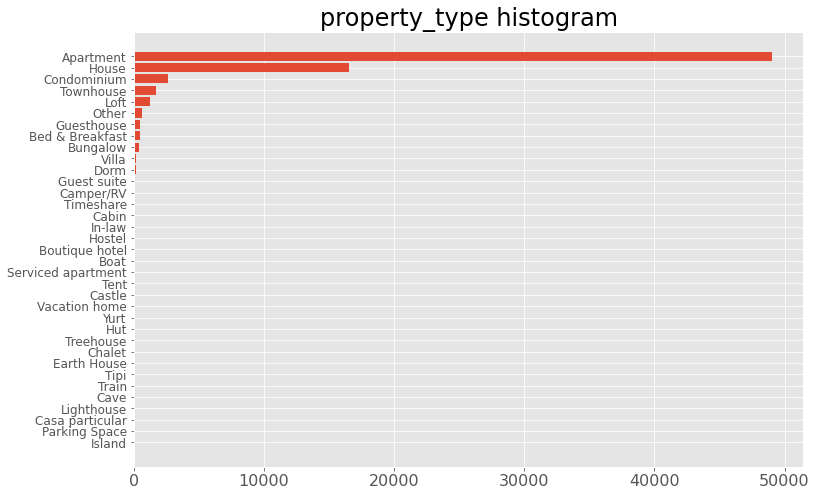

In [14]:
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 12
import matplotlib as mpl
mpl.rcParams['font.size'] = 20
explore_col('property_type')

room_type description
 count               74111
unique                  3
top       Entire home/apt
freq                41310
Name: room_type, dtype: object
Top 5 frequent: ['Entire home/apt', 'Private room', 'Shared room']


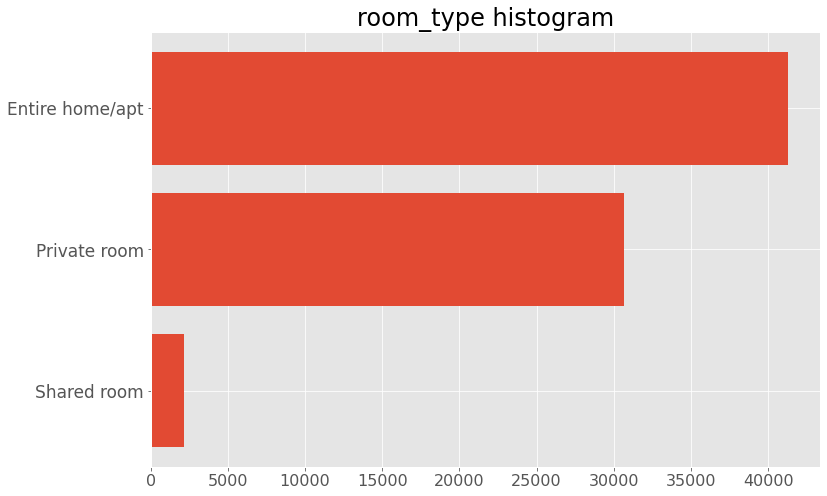

In [15]:
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 17
explore_col('room_type')

bed_type description
 count        74111
unique           5
top       Real Bed
freq         72028
Name: bed_type, dtype: object
Top 5 frequent: ['Real Bed', 'Futon', 'Pull-out Sofa', 'Airbed', 'Couch']


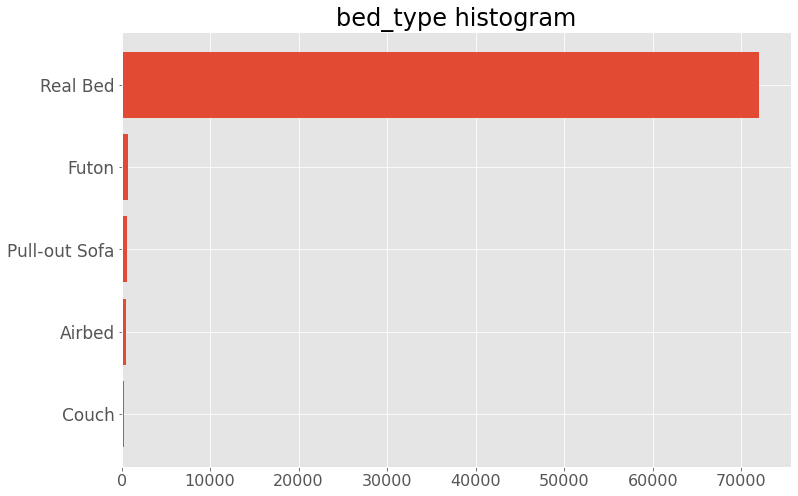

In [16]:
explore_col('bed_type')

cancellation_policy description
 count      74111
unique         5
top       strict
freq       32374
Name: cancellation_policy, dtype: object
Top 5 frequent: ['strict', 'flexible', 'moderate', 'super_strict_30', 'super_strict_60']


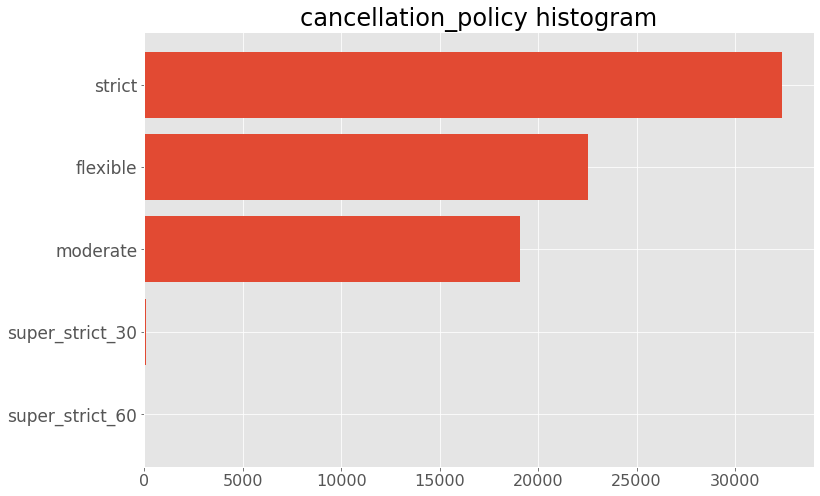

In [17]:
explore_col('cancellation_policy')

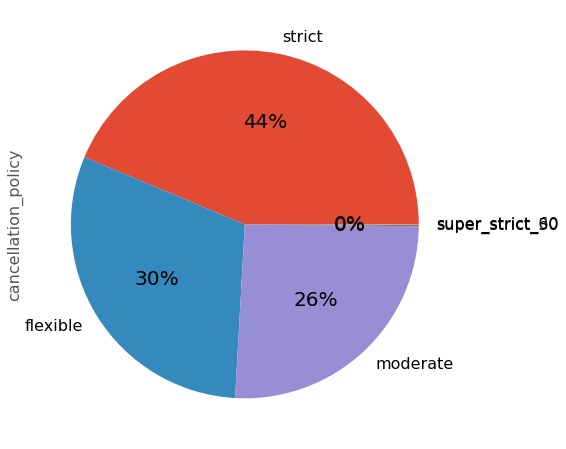

In [18]:
pie_col('cancellation_policy')

city description
 count     74111
unique        6
top         NYC
freq      32349
Name: city, dtype: object
Top 5 frequent: ['NYC', 'LA', 'SF', 'DC', 'Chicago']


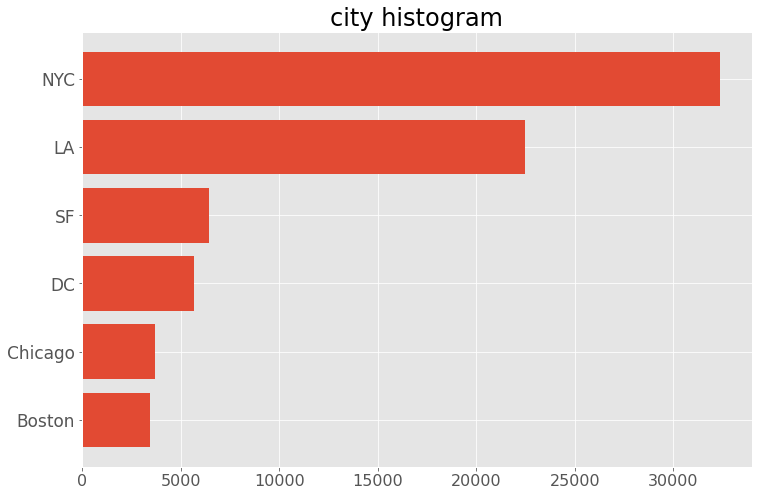

In [19]:
explore_col('city')

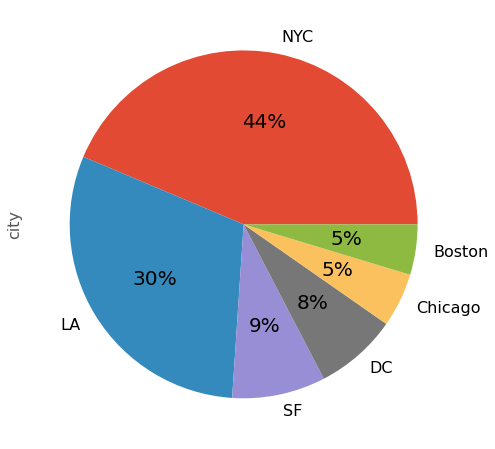

In [20]:
pie_col('city')

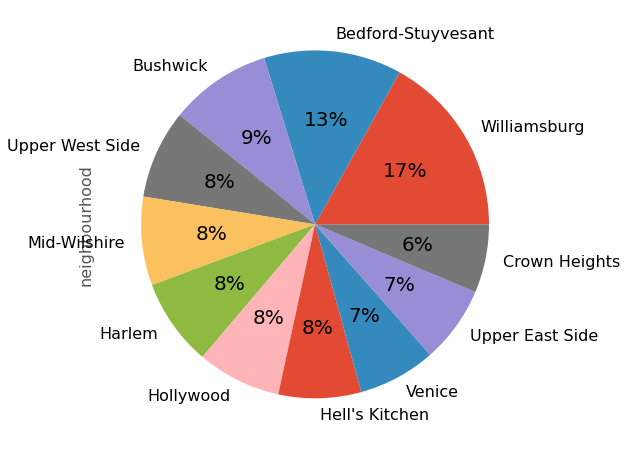

In [21]:
plt.rcParams['xtick.labelsize'] = 16

#explore_col('neighbourhood')
#pie_col('neighbourhood')
neighbourhood_morethan_1000 = data.neighbourhood.value_counts()
neighbourhood_morethan_1000 [neighbourhood_morethan_1000 >1000].plot.pie(autopct='%1.0f%%')

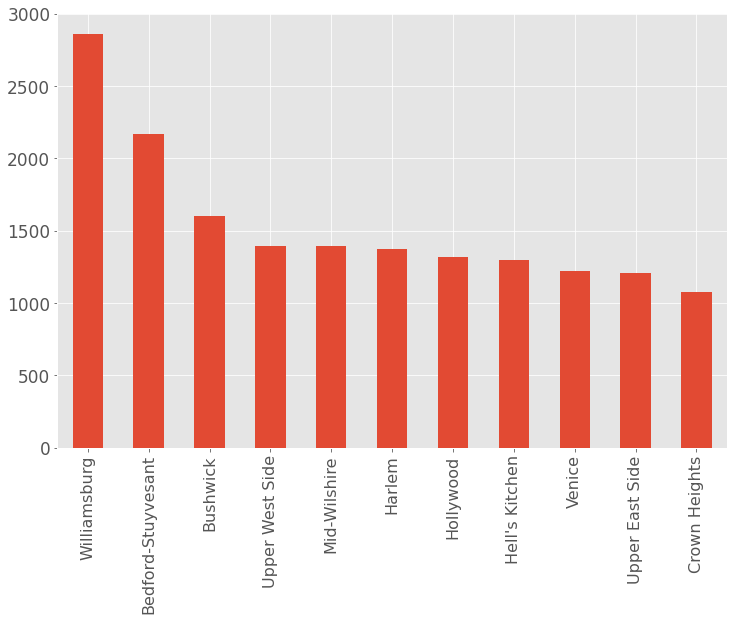

In [22]:
neighbourhood_morethan_1000 [neighbourhood_morethan_1000 >1000].plot.bar()

In [23]:
def plt_density(column,title=None):
  if title==None:
    title=column
  plt.figure(figsize = (15, 8))
  sns.distplot(data[column])
  plt.title(title)
  plt.show()
  return

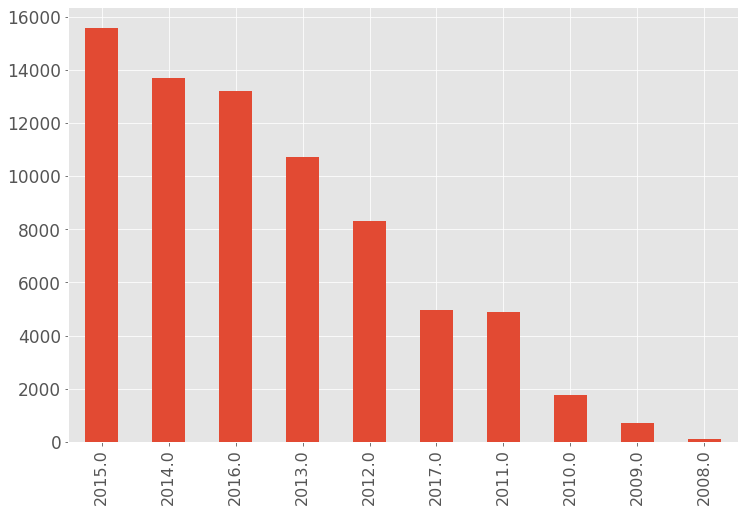

In [24]:
years =  pd.to_datetime(data['host_since'], format='%Y-%m-%d', errors='coerce').dt.year
years.value_counts().plot.bar()

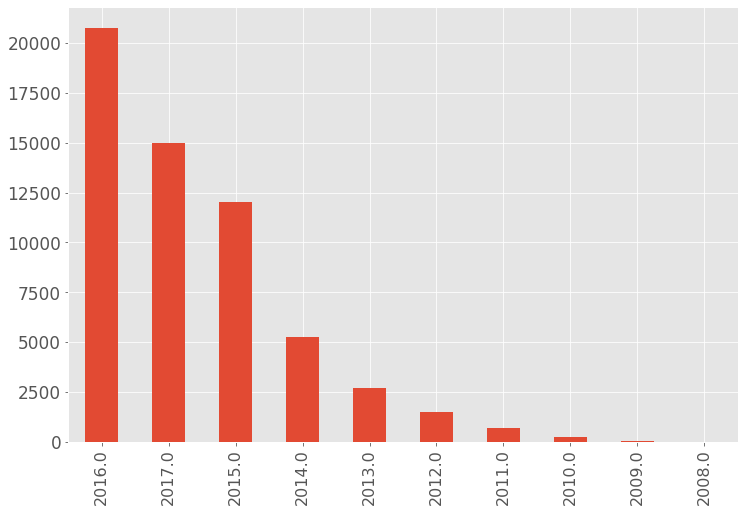

In [25]:
years =  pd.to_datetime(data['first_review'], format='%Y-%m-%d', errors='coerce').dt.year
years.value_counts().plot.bar()

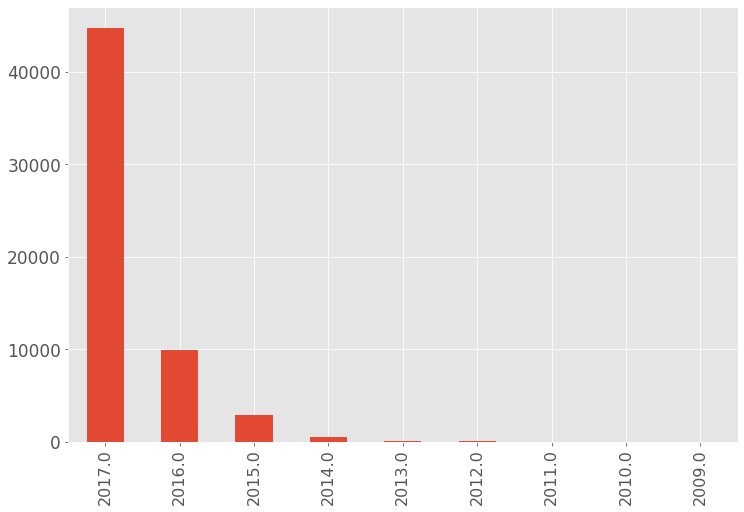

In [26]:
years =  pd.to_datetime(data['last_review'], format='%Y-%m-%d', errors='coerce').dt.year
years.value_counts().plot.bar()

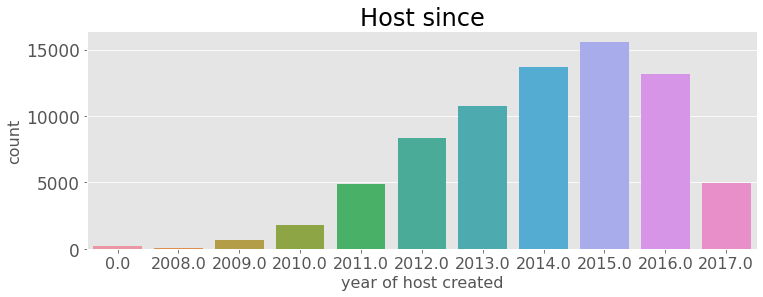

In [27]:
years_of_host_created = pd.DataFrame({
    'year of host created':pd.to_datetime(data['host_since'], format='%Y-%m-%d', errors='coerce').dt.year.fillna(0),
    'log_price': data['log_price']
})
plt.figure(figsize=(12,4))

sns.countplot(x="year of host created", data=years_of_host_created)
plt.title('Host since')
plt.show()

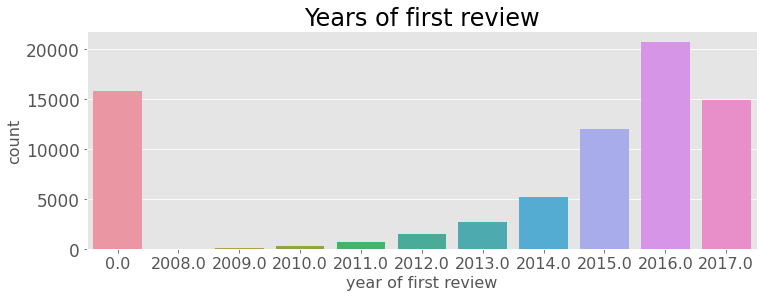

In [28]:
years_of_first_review = pd.DataFrame({
    'year of first review':pd.to_datetime(data['first_review'], format='%Y-%m-%d', errors='coerce').dt.year.fillna(0),
    'log_price': data['log_price']
})
plt.figure(figsize=(12,4))

sns.countplot(x="year of first review", data=years_of_first_review)
plt.title('Years of first review')
plt.show()

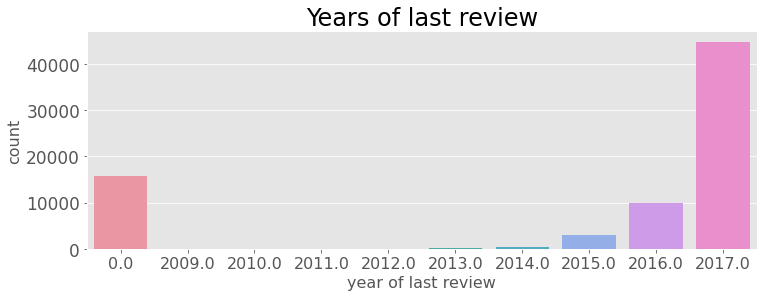

In [29]:
years_of_last_review = pd.DataFrame({
    'year of last review':pd.to_datetime(data['last_review'], format='%Y-%m-%d', errors='coerce').dt.year.fillna(0),
    'log_price': data['log_price']
})
plt.figure(figsize=(12,4))

sns.countplot(x="year of last review", data=years_of_last_review)
plt.title('Years of last review')
plt.show()

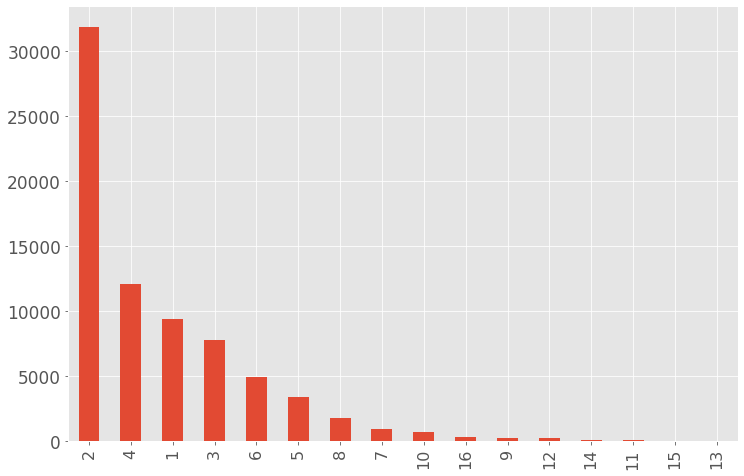

In [30]:
data.accommodates.value_counts().plot.bar()

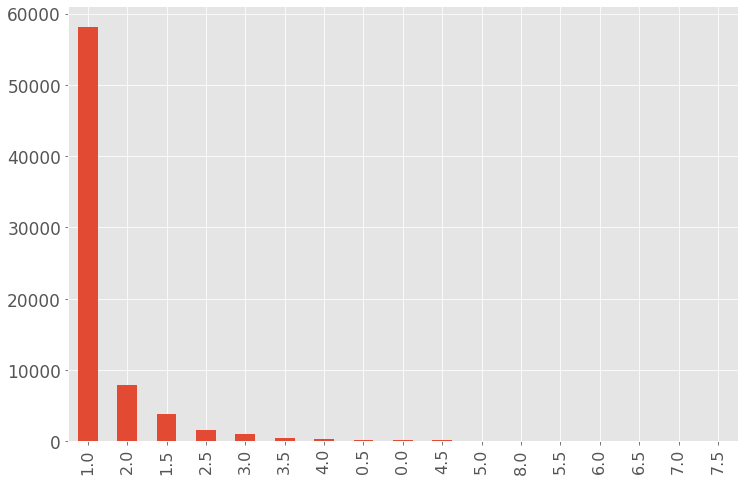

In [31]:
data.bathrooms.value_counts().plot.bar()

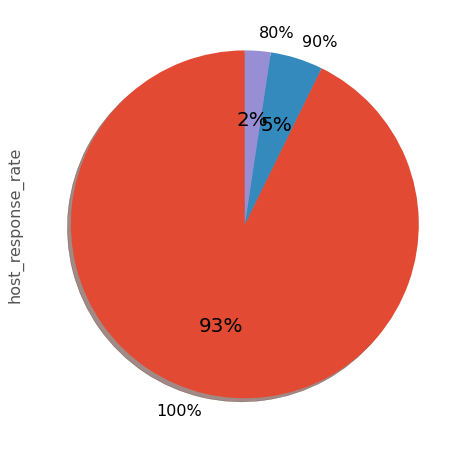

In [32]:
#explore_col('host_response_rate')
host_response_rate = data.host_response_rate.value_counts()
explode = (0.1, 0.2, 0.1)
host_response_rate [host_response_rate > 1000].plot.pie(shadow=True, startangle=90,autopct='%1.0f%%')

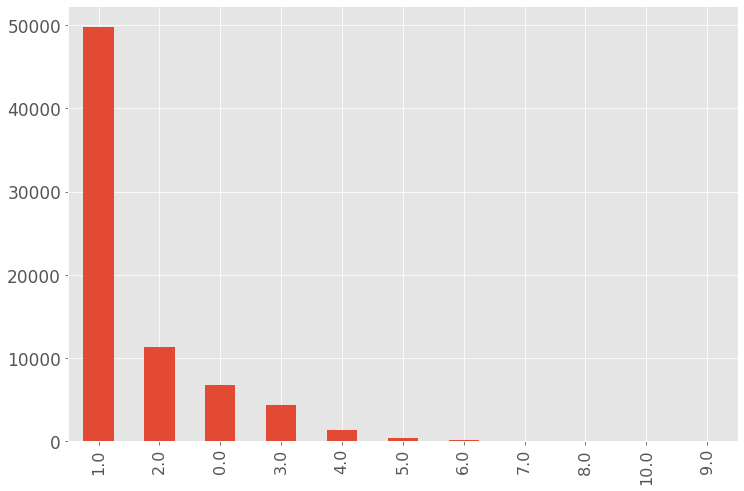

In [33]:
data.bedrooms.value_counts().plot.bar()

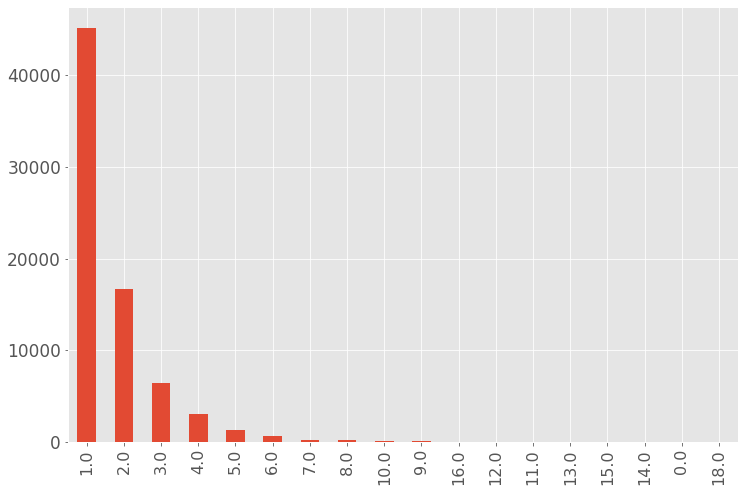

In [34]:
data.beds.value_counts().plot.bar()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


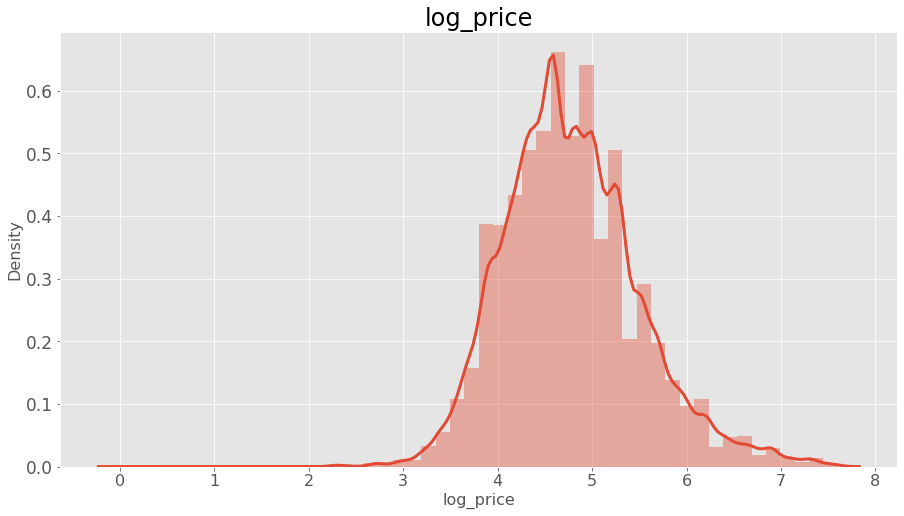

In [35]:
plt_density('log_price')

In [36]:
data.log_price.describe()

count    74111.000000
mean         4.782069
std          0.717394
min          0.000000
25%          4.317488
50%          4.709530
75%          5.220356
max          7.600402
Name: log_price, dtype: float64

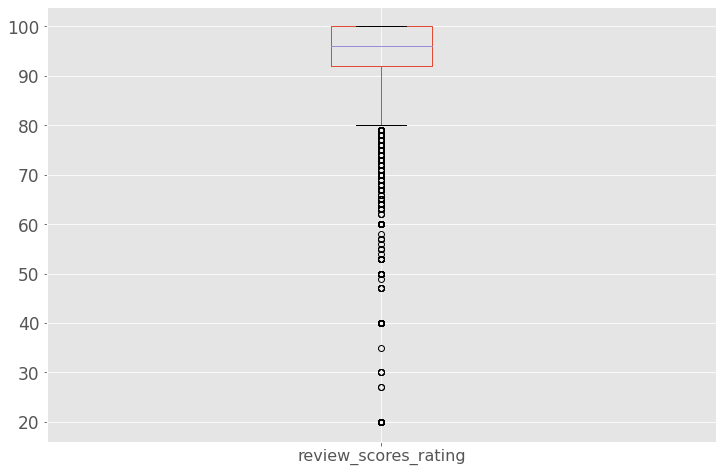

In [37]:
data.review_scores_rating.plot.box()

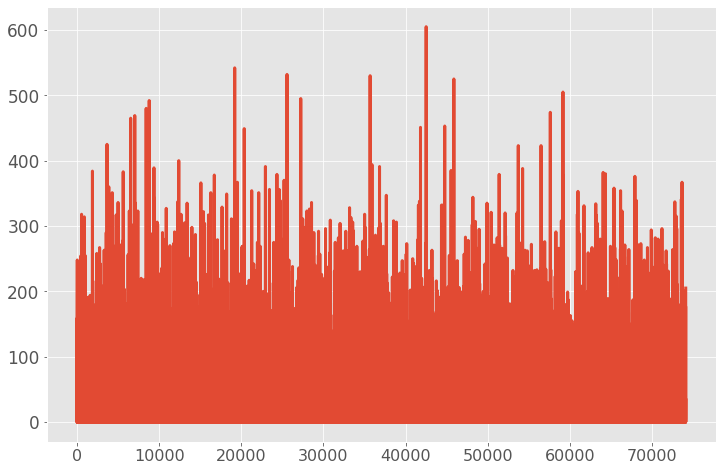

In [38]:
data.number_of_reviews.plot()

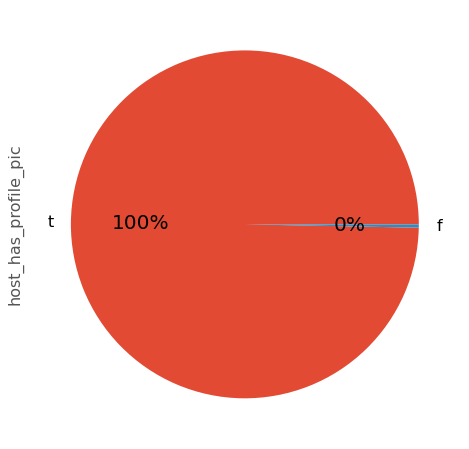

In [39]:
pie_col('host_has_profile_pic')

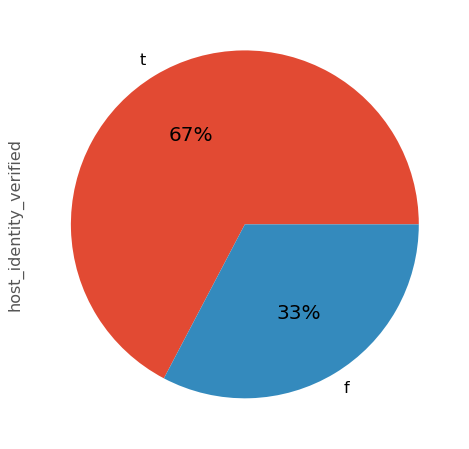

In [40]:
pie_col('host_identity_verified')

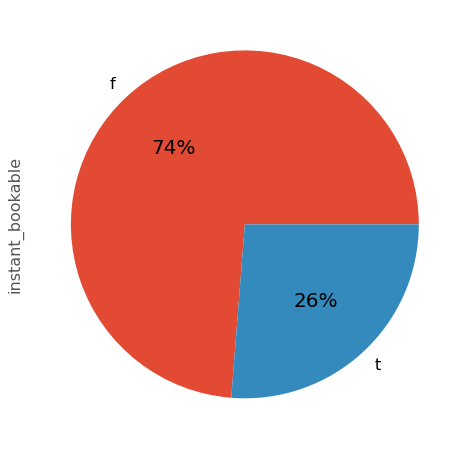

In [41]:
pie_col('instant_bookable')

In [42]:
#Composite type attr.
amenities_col = []
amenities_map = {}
for s in data.amenities:
  s = s.replace('{','')
  s = s.replace('}','')
  s = s.replace('"','')
  s = s.split(',')
  amenities_col.append(max(len(s)-1,0))
  for k in s:
    if amenities_map.get(k) != None:
      amenities_map[k] +=1 
    else:
      amenities_map[k] = 1

<BarContainer object of 20 artists>

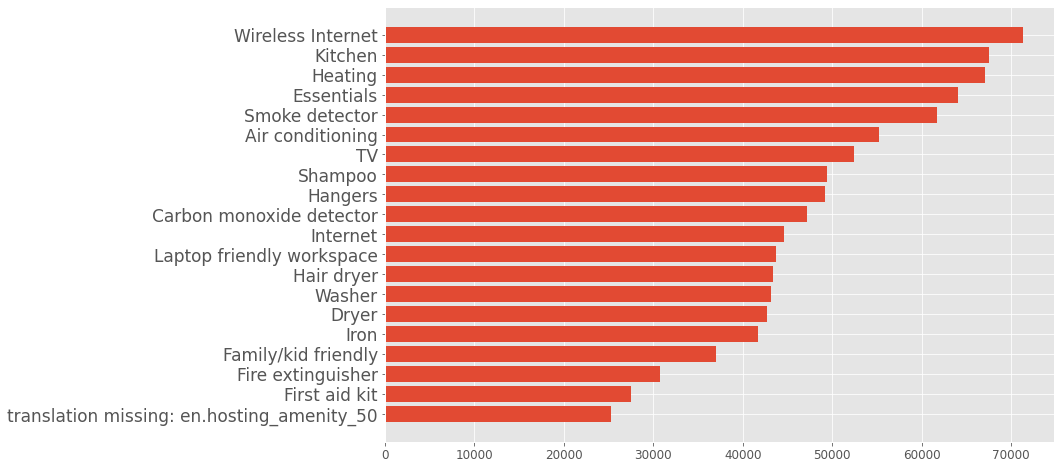

In [43]:
sorted_values = sorted(amenities_map.values()) # Sort the values
sorted_dict = {}
for i in sorted_values:
    for k in amenities_map.keys():
        if amenities_map[k] == i:
            sorted_dict[k] = amenities_map[k]
            break

keys = sorted_dict.keys()

values = sorted_dict.values()

plt.xticks(fontsize=12)
n = 20
plt.barh(list(keys)[-n:], list(values)[-n:], align='center')


# **Pre-processing and Features Extraction**

In [44]:
data.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

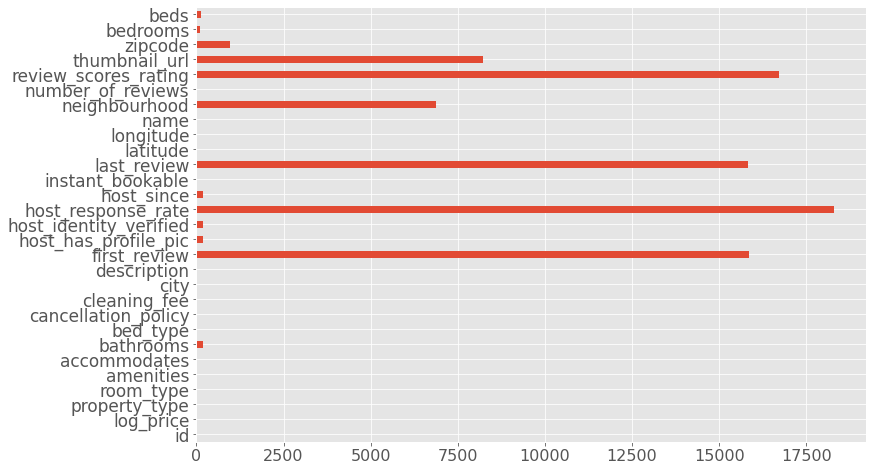

In [46]:
data.isnull().sum().plot.barh()

In [47]:
cleaned_data = data.drop(['id','description','first_review','last_review','host_since','host_has_profile_pic','name','thumbnail_url','zipcode','neighbourhood'],axis=1)
cleaned_data.columns

Index(['log_price', 'property_type', 'room_type', 'amenities', 'accommodates',
       'bathrooms', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'host_identity_verified', 'host_response_rate', 'instant_bookable',
       'latitude', 'longitude', 'number_of_reviews', 'review_scores_rating',
       'bedrooms', 'beds'],
      dtype='object')

In [48]:
# Those columns are needed to be processed
"""
 5   bathrooms               73911 non-null  float64
 10  host_identity_verified  73923 non-null  object 
 11  host_response_rate      55812 non-null  object 
 15  neighbourhood           67239 non-null  object 
 17  review_scores_rating    57389 non-null  float64
 18  bedrooms                74020 non-null  float64
 19  beds                    73980 non-null  float64
"""
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   log_price               74111 non-null  float64
 1   property_type           74111 non-null  object 
 2   room_type               74111 non-null  object 
 3   amenities               74111 non-null  object 
 4   accommodates            74111 non-null  int64  
 5   bathrooms               73911 non-null  float64
 6   bed_type                74111 non-null  object 
 7   cancellation_policy     74111 non-null  object 
 8   cleaning_fee            74111 non-null  bool   
 9   city                    74111 non-null  object 
 10  host_identity_verified  73923 non-null  object 
 11  host_response_rate      55812 non-null  object 
 12  instant_bookable        74111 non-null  object 
 13  latitude                74111 non-null  float64
 14  longitude               74111 non-null

In [49]:
# Numeric values fill with mean of each column of it
cleaned_data.bathrooms = cleaned_data.bathrooms.fillna(int(cleaned_data.bathrooms.mean()))
cleaned_data.bedrooms = cleaned_data.bedrooms.fillna(int(cleaned_data.bedrooms.mean()))
cleaned_data.beds = cleaned_data.beds.fillna(int(cleaned_data.beds.mean()))
cleaned_data.review_scores_rating = cleaned_data.review_scores_rating.fillna(cleaned_data.review_scores_rating.mean())

In [50]:
# Fixing host response rate and change its value to the correct data type
cleaned_data.host_response_rate = cleaned_data.host_response_rate.apply(lambda x: int(x[:len(x)-1])/100 if isinstance(x,str) else x)
cleaned_data.host_response_rate = cleaned_data.host_response_rate.fillna(cleaned_data.host_response_rate.mean())

In [51]:
# Changing all boolean objects to 0/1
cleaned_data.host_identity_verified = cleaned_data.host_identity_verified.apply(lambda x: True if x=='t' else False)

In [52]:
cleaned_data.instant_bookable = cleaned_data.instant_bookable.apply(lambda x: True if x=='t' else False)

In [53]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   log_price               74111 non-null  float64
 1   property_type           74111 non-null  object 
 2   room_type               74111 non-null  object 
 3   amenities               74111 non-null  object 
 4   accommodates            74111 non-null  int64  
 5   bathrooms               74111 non-null  float64
 6   bed_type                74111 non-null  object 
 7   cancellation_policy     74111 non-null  object 
 8   cleaning_fee            74111 non-null  bool   
 9   city                    74111 non-null  object 
 10  host_identity_verified  74111 non-null  bool   
 11  host_response_rate      74111 non-null  float64
 12  instant_bookable        74111 non-null  bool   
 13  latitude                74111 non-null  float64
 14  longitude               74111 non-null

In [54]:
# Factorization of categorical columns
"""
 1   property_type           74111 non-null  object # 35 <-----------------
 2   room_type               74111 non-null  object # 3 
 6   bed_type                74111 non-null  object # 5
 7   cancellation_policy     74111 non-null  object # 5
 9   city                    74111 non-null  object # 6
"""
pass

In [55]:
def col_price(column):
  plot_data = pd.DataFrame({
      'data': cleaned_data[column],
      'log_price': cleaned_data.log_price
  })
  sns.countplot(x="data", data=plot_data)
  plt.title(column+' with log price')
  plt.show()


  plt.figure(figsize=(12,8))
  g = sns.boxplot(data=plot_data,orient='v', x = 'data', y = 'log_price')
  plt.title(column+' with log price')
  plt.show()
  return g

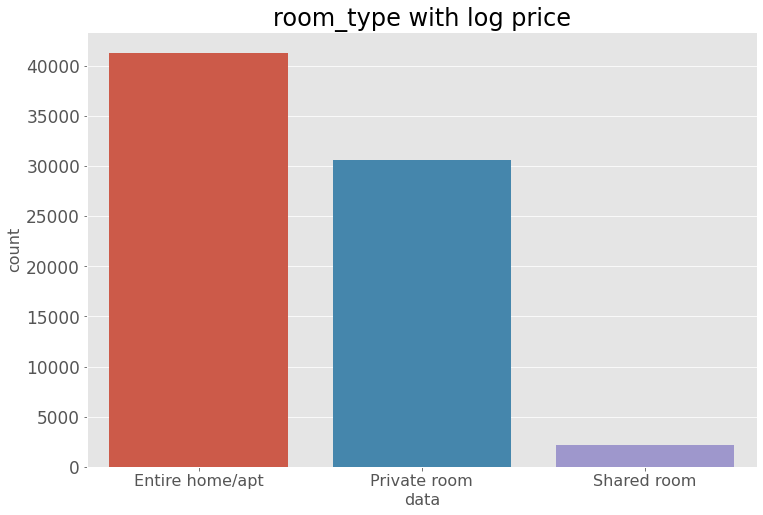

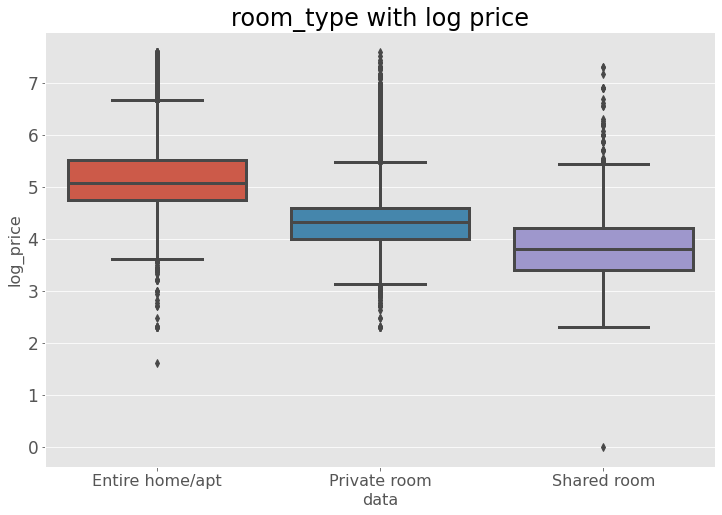

In [56]:
col_price('room_type')

In [57]:
cleaned_data.room_type.unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [58]:
cleaned_data.room_type = cleaned_data.room_type.apply(lambda x: 3 if x=='Entire home/apt' else 2 if x=='Private room' else 1)

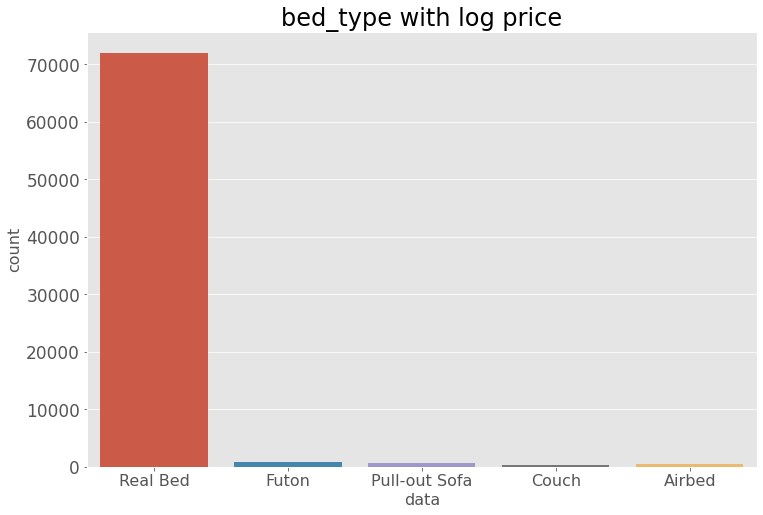

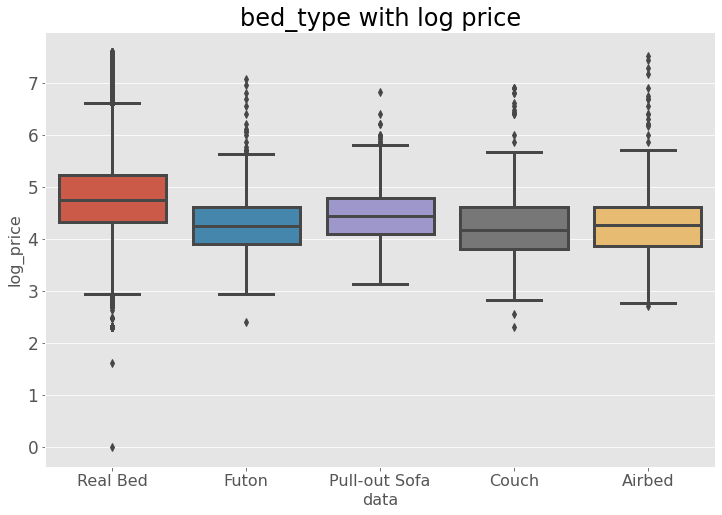

In [59]:
col_price('bed_type')

In [60]:
cleaned_data.bed_type.unique()

array(['Real Bed', 'Futon', 'Pull-out Sofa', 'Couch', 'Airbed'],
      dtype=object)

In [61]:
cleaned_data.bed_type = cleaned_data.bed_type.apply(lambda x: 2 if x=='Real Bed' else 1)

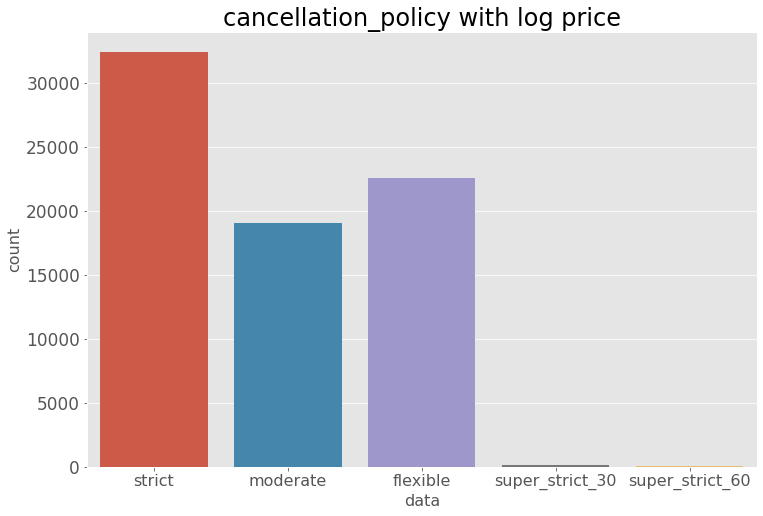

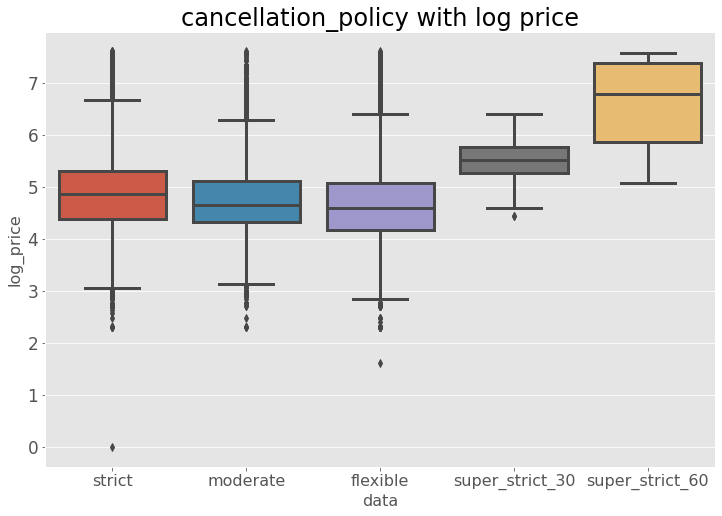

In [62]:
col_price('cancellation_policy')

In [63]:
cleaned_data.cancellation_policy.unique()

array(['strict', 'moderate', 'flexible', 'super_strict_30',
       'super_strict_60'], dtype=object)

In [64]:
cleaned_data.cancellation_policy = cleaned_data.cancellation_policy.apply(lambda x: 3 if x=='super_strict_60' else 2 if x=='super_strict_30' else 1)

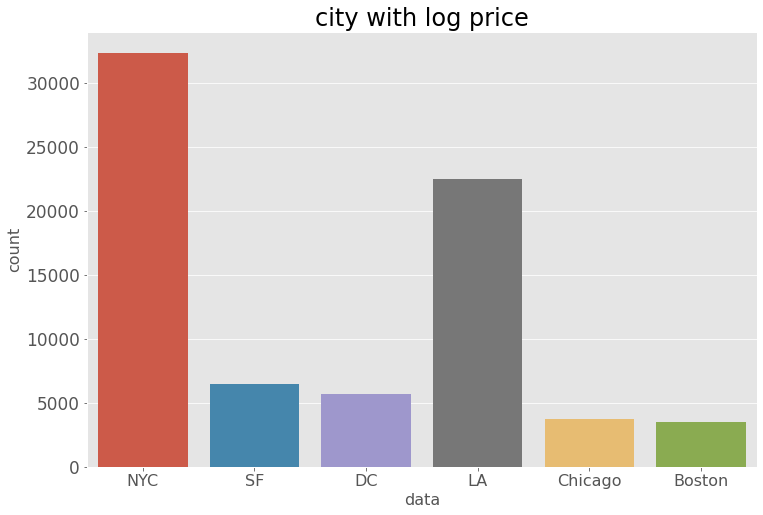

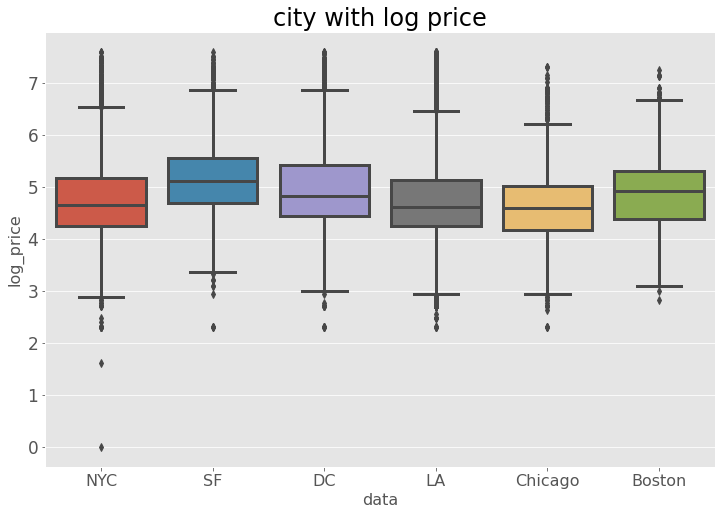

In [65]:
col_price('city')

In [66]:
cleaned_data.city.unique()

array(['NYC', 'SF', 'DC', 'LA', 'Chicago', 'Boston'], dtype=object)

In [67]:
cleaned_data = pd.concat([cleaned_data, pd.get_dummies(cleaned_data['city'], prefix='city')],axis=1)

In [68]:
cleaned_data = cleaned_data.drop(['city'],axis=1)

In [69]:
cleaned_data = cleaned_data.drop(['latitude',	'longitude'],axis=1)

In [70]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   log_price               74111 non-null  float64
 1   property_type           74111 non-null  object 
 2   room_type               74111 non-null  int64  
 3   amenities               74111 non-null  object 
 4   accommodates            74111 non-null  int64  
 5   bathrooms               74111 non-null  float64
 6   bed_type                74111 non-null  int64  
 7   cancellation_policy     74111 non-null  int64  
 8   cleaning_fee            74111 non-null  bool   
 9   host_identity_verified  74111 non-null  bool   
 10  host_response_rate      74111 non-null  float64
 11  instant_bookable        74111 non-null  bool   
 12  number_of_reviews       74111 non-null  int64  
 13  review_scores_rating    74111 non-null  float64
 14  bedrooms                74111 non-null

In [71]:
cleaned_data['amenities_count'] = pd.Series(amenities_col)

In [72]:
cleaned_data = cleaned_data.drop(['amenities'], axis=1)

In [73]:
cleaned_data.review_scores_rating = cleaned_data.review_scores_rating/100

In [74]:
types = cleaned_data.property_type.unique()
pt_map = {}
for t in types:
  m = cleaned_data[cleaned_data.property_type == t]['log_price'].mean()
  pt_map[t] = m
sorted_values = sorted(pt_map.values()) # Sort the values
sorted_dict = {}
for i in sorted_values:
    for k in pt_map.keys():
        if pt_map[k] == i:
            sorted_dict[k] = pt_map[k]
            break
cleaned_data.property_type = cleaned_data.property_type.apply(lambda x : pt_map[x])

In [75]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   log_price               74111 non-null  float64
 1   property_type           74111 non-null  float64
 2   room_type               74111 non-null  int64  
 3   accommodates            74111 non-null  int64  
 4   bathrooms               74111 non-null  float64
 5   bed_type                74111 non-null  int64  
 6   cancellation_policy     74111 non-null  int64  
 7   cleaning_fee            74111 non-null  bool   
 8   host_identity_verified  74111 non-null  bool   
 9   host_response_rate      74111 non-null  float64
 10  instant_bookable        74111 non-null  bool   
 11  number_of_reviews       74111 non-null  int64  
 12  review_scores_rating    74111 non-null  float64
 13  bedrooms                74111 non-null  float64
 14  beds                    74111 non-null

In [76]:
import plotly.figure_factory as ff
corrs = cleaned_data.corr()
figure = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)
figure.show()

In [77]:
cleaned_data.corr()

,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,host_identity_verified,host_response_rate,instant_bookable,number_of_reviews,review_scores_rating,bedrooms,beds,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF,amenities_count
log_price,1.000000,0.131920,0.607125,0.567574,0.355174,0.099230,0.053591,0.111191,0.024325,-0.005748,-0.044271,-0.032470,0.074822,0.473028,0.441953,0.031492,-0.051902,0.082282,-0.056585,-0.076958,0.166738,0.194528
property_type,0.131920,1.000000,0.075693,0.076109,0.017506,0.000050,0.012212,0.039204,0.017246,0.015923,0.002570,-0.012348,0.047226,0.075922,0.006950,0.032733,0.041906,0.016677,0.016136,-0.084214,0.049188,0.091635
room_type,0.607125,0.075693,1.000000,0.458175,0.116256,0.151812,0.034032,0.213340,0.070130,0.037366,-0.027729,0.030333,0.038630,0.243132,0.317588,0.030888,0.016889,0.067679,0.008993,-0.081014,0.027774,0.174204
accommodates,0.567574,0.076109,0.458175,1.000000,0.505490,0.083786,0.024219,0.182306,0.058898,0.043242,0.053093,0.041964,-0.015006,0.709214,0.810247,0.015069,0.070227,0.051560,0.077177,-0.137701,0.002087,0.264945
bathrooms,0.355174,0.017506,0.116256,0.505490,1.000000,0.045179,0.028394,0.054134,0.015748,0.006170,0.001912,-0.041521,0.009162,0.589783,0.525699,0.000694,0.019127,0.039360,0.130272,-0.157821,0.012810,0.160871
bed_type,0.099230,0.000050,0.151812,0.083786,0.045179,1.000000,0.006803,0.027916,0.002301,0.005222,0.029819,-0.004146,-0.002688,0.063839,0.071983,0.006368,-0.002046,-0.000653,0.000546,-0.004244,0.004012,0.035258
cancellation_policy,0.053591,0.012212,0.034032,0.024219,0.028394,0.006803,1.000000,0.007954,0.016330,-0.023438,-0.006427,-0.013585,-0.017600,0.028069,0.013641,0.039140,-0.000410,0.044051,-0.012661,-0.029132,0.001289,0.003754
cleaning_fee,0.111191,0.039204,0.213340,0.182306,0.054134,0.027916,0.007954,1.000000,0.161898,0.093006,0.010031,0.110204,0.028085,0.105491,0.132089,0.015361,0.008949,-0.047775,0.068772,-0.052808,0.007480,0.240181
host_identity_verified,0.024325,0.017246,0.070130,0.058898,0.015748,0.002301,0.016330,0.161898,1.000000,0.069387,-0.087141,0.161823,0.046500,0.026562,0.036972,-0.029777,0.056782,0.013149,0.036449,-0.069947,0.029594,0.140892
host_response_rate,-0.005748,0.015923,0.037366,0.043242,0.006170,0.005222,-0.023438,0.093006,0.069387,1.000000,0.091710,0.117549,0.061340,0.018562,0.038661,0.033031,0.027254,0.002774,-0.010366,-0.035636,0.031158,0.125480


In [78]:
## Removing correlated features and unneeded ones
#cleaned_data = cleaned_data.drop(['beds','bathrooms','bedrooms','instant_bookable','number_of_reviews','host_response_rate'],axis=1)

In [79]:
#cleaned_data = cleaned_data.drop(['host_response_rate',],axis=1)

In [80]:
import plotly.figure_factory as ff
corrs = cleaned_data.corr()
figure = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)
figure.show()

# **Data associations and Insights**

In [81]:
import plotly.express as px
def create_map(city):
    price_view = lambda x: 'price: ' + str(round(x, 2))

    if city in {'NYC', 'LA'}:
        fraction = 0.2
    else:
        fraction = 0.6
        
    df_temp = data[data['city'] == city].sample(frac=fraction,random_state=101)
    df_temp['log_price'] = np.round(df_temp['log_price'], 2)
    
    fig = px.scatter_mapbox(df_temp, 
                            lat="latitude", 
                            lon="longitude", 
                            hover_data=["log_price"],
                            color='log_price', 
                            zoom=10)
    
    fig.update_layout(
            title = f'Airbnb prices in {city}',
            geo_scope='usa',
            width=1000, 
            height=600,
            mapbox_style="white-bg",
            mapbox_layers=[{
                 "below": 'traces',
                 "sourcetype": "raster",
                 "sourceattribution": "United States Geological Survey",
                 "source": ["https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"]
              }]
    )
    #fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
    #fig.update_geos(fitbounds="locations")
    fig.show()
    
#city = interact(lambda x: create_map(x), x=['NYC', 'LA', 'SF', 'DC', 'Chicago', 'Boston'])  #widget
create_map('NYC')

In [82]:
import pandas as pd
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

frequent_itemsets = apriori(cleaned_data[['cleaning_fee','host_identity_verified','instant_bookable']], min_support=0.07, use_colnames=True)
frequent_itemsets


,support,itemsets
0,0.734075,(cleaning_fee)
1,0.671263,(host_identity_verified)
2,0.262458,(instant_bookable)
3,0.526359,"(cleaning_fee, host_identity_verified)"
4,0.194613,"(cleaning_fee, instant_bookable)"
5,0.158168,"(instant_bookable, host_identity_verified)"
6,0.126837,"(cleaning_fee, instant_bookable, host_identity..."


In [83]:
property_types = data.property_type.unique()
for pt in property_types:
  s = data.property_type == pt
  print('Support of',pt,np.sum(s)/len(s))

Support of Apartment 0.661210886373143
Support of House 0.22278744046093021
Support of Condominium 0.03586512123706333
Support of Loft 0.01678563236226741
Support of Townhouse 0.022830618936460174
Support of Hostel 0.0009445291522176195
Support of Guest suite 0.0016596726531823887
Support of Bed & Breakfast 0.0062338924046362884
Support of Bungalow 0.004938538138737839
Support of Guesthouse 0.006719650254348207
Support of Dorm 0.0019160448516414568
Support of Other 0.008190417077087071
Support of Camper/RV 0.0012683677186922319
Support of Villa 0.002415295974956484
Support of Boutique hotel 0.0009310358786145107
Support of Timeshare 0.0010389820674393815
Support of In-law 0.0009580224258207284
Support of Boat 0.0008770627842020753
Support of Serviced apartment 0.00028335874566528586
Support of Castle 0.00017541255684041507
Support of Cabin 0.0009715156994238373
Support of Treehouse 9.445291522176195e-05
Support of Tipi 4.047982080932655e-05
Support of Vacation home 0.000148426009634197

In [84]:
arr = data.city.unique()
print(arr)
for ai in arr:
  s = data.city == ai
  print('Support of',ai,np.sum(s)/len(s))

['NYC' 'SF' 'DC' 'LA' 'Chicago' 'Boston']
Support of NYC 0.43649390778696817
Support of SF 0.08681572236240234
Support of DC 0.07674974025448314
Support of LA 0.302964472210603
Support of Chicago 0.050181484529961816
Support of Boston 0.04679467285558149


# **Model selection and tuning and Results/Evaluations**

In [85]:
pp_data = cleaned_data

In [86]:
# Spliting the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
train, val  = train_test_split(pp_data, test_size=0.2)
X_train = train.drop(['log_price'], axis=1)
#X_train = scaler.fit_transform(X_train)
y_train = train.log_price
X_val = val.drop(['log_price'], axis=1)
#X_val = scaler.transform(X_val) 
y_val = val.log_price


In [87]:
def analysis(model, X_train, X_test, y_train, y_test):
    
    prediction_test = model.predict(X_test)
    prediction_train = model.predict(X_train)
        
    
    show_metrics(prediction_test, prediction_train, y_test, y_train)
    
    sns.regplot(x = y_test, y = prediction_test, fit_reg=False)
    plt.title('Prediction and real')
    plt.show()

    sns.distplot(y_test - prediction_test, bins = 50)
    plt.title('Error variance')
    plt.show()

In [88]:
from sklearn import metrics
from scipy import stats

def show_metrics(prediction_test, prediction_train, y_test, y_train):
    MAE = round(metrics.mean_absolute_error(y_test, prediction_test), 2)
    MSE = round(metrics.mean_squared_error(y_test, prediction_test), 2)
    RMSE = round(np.sqrt(metrics.mean_squared_error(y_test, prediction_test)), 2)
    RMSE_ratio_test= round(np.sqrt(metrics.mean_squared_error(y_test, prediction_test)) / np.mean(y_test),3)
    RMSE_ratio_train = round(np.sqrt(metrics.mean_squared_error(y_train, prediction_train)) / np.mean(y_train),3)
    R_2_test = round(metrics.explained_variance_score(y_test, prediction_test), 2)
    R_2_train = round(metrics.explained_variance_score(y_train, prediction_train), 2)
    
    metrics_data = pd.DataFrame(data = [MAE, MSE, RMSE, RMSE_ratio_test, 
                                    RMSE_ratio_train, R_2_test, R_2_train]).T
    
    metrics_data.columns = ['MAE', 'MSE', 'RMSE', 'RMSE_ratio_test', 
                                    'RMSE_ratio_train', 'R_2_test', 'R_2_train']
    display(metrics_data)

,MAE,MSE,RMSE,RMSE_ratio_test,RMSE_ratio_train,R_2_test,R_2_train
0,0.34,0.2,0.45,0.094,0.089,0.61,0.65


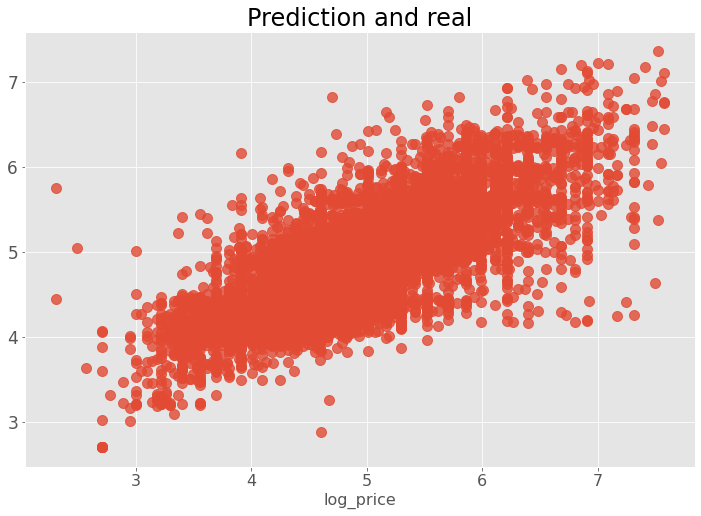

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



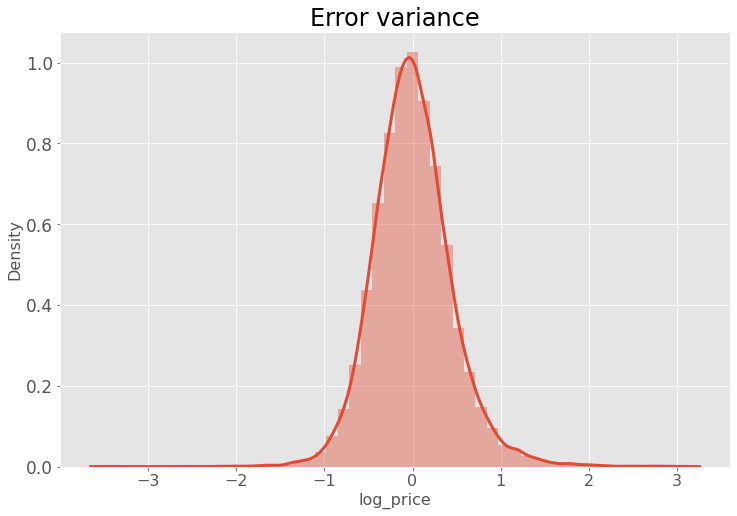

In [89]:
from sklearn.ensemble import RandomForestRegressor

rfm = RandomForestRegressor(
          max_depth = 10,
          n_jobs = -1, 
          n_estimators = 10
)
rfm.fit(X_train, y_train)
analysis(
    model = rfm, 
    X_train = X_train,
    X_test = X_val,
    y_train = y_train,
    y_test =  y_val
)


In [91]:
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import  mean_squared_error, r2_score

# Running model a XGB Regressor
model = xgb.XGBRegressor()

# Fit the model on training data
model.fit(X_train, y_train)

# Predict
pred_train = model.predict(X_train)

# Validate
pred_val = model.predict(X_val)

print("\nTraining MSE:", round(mean_squared_error(y_train, pred_train),4))
print("Validation MSE:", round(mean_squared_error(y_val, pred_val),4))
print("\nTraining r2:", round(r2_score(y_train, pred_train),4))
print("Validation r2:", round(r2_score(y_val, pred_val),4))

[10:28:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

Training MSE: 0.2015
Validation MSE: 0.2001

Training r2: 0.6091
Validation r2: 0.6085


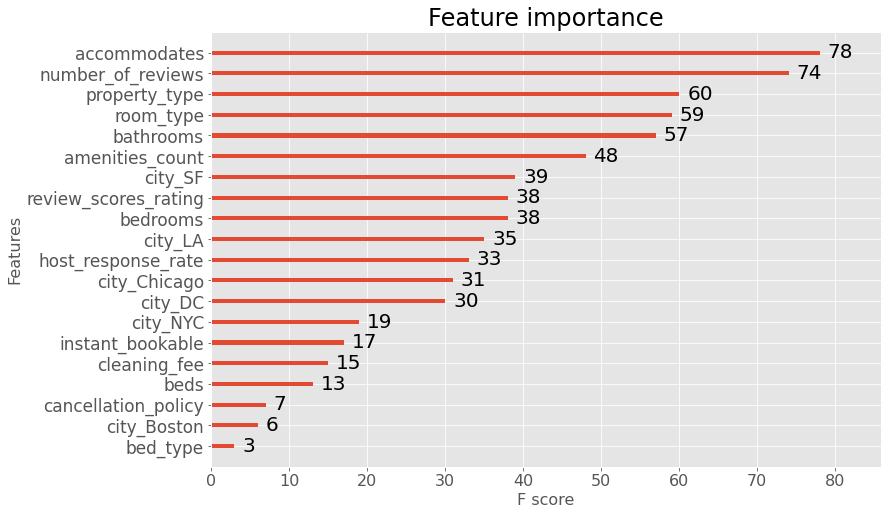

In [92]:
plot_importance(model)

,MAE,MSE,RMSE,RMSE_ratio_test,RMSE_ratio_train,R_2_test,R_2_train
0,0.34,0.2,0.45,0.094,0.094,0.61,0.61


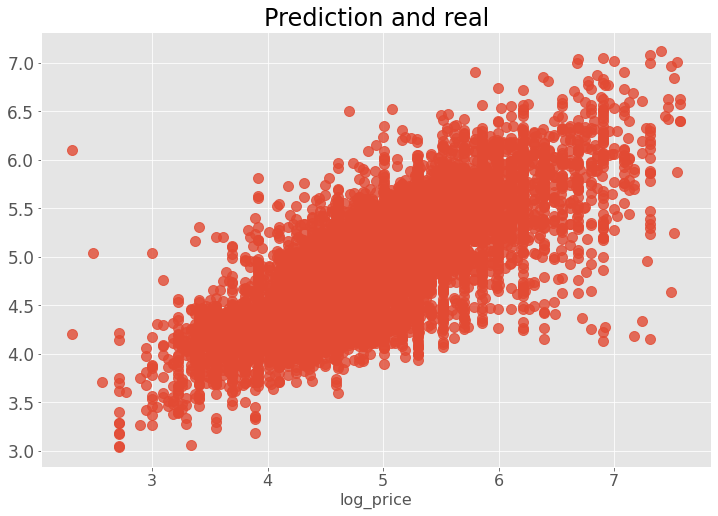

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



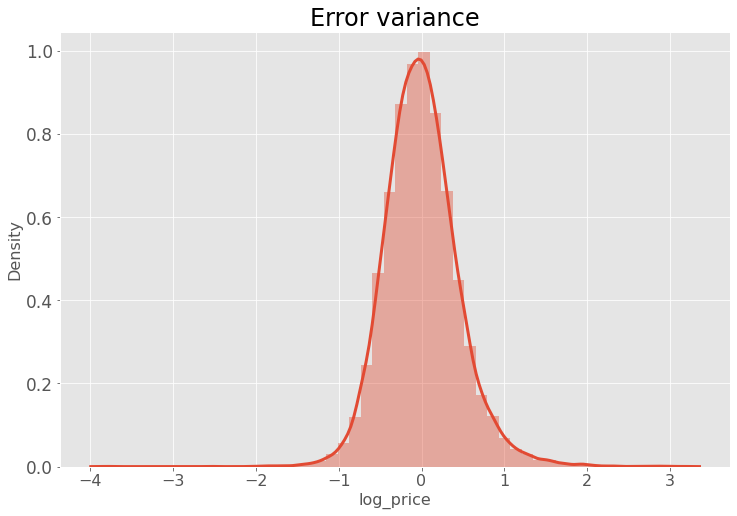

In [93]:

analysis(
    model = model, 
    X_train = X_train,
    X_test = X_val,
    y_train = y_train,
    y_test =  y_val
)


[10:29:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.608525212354935

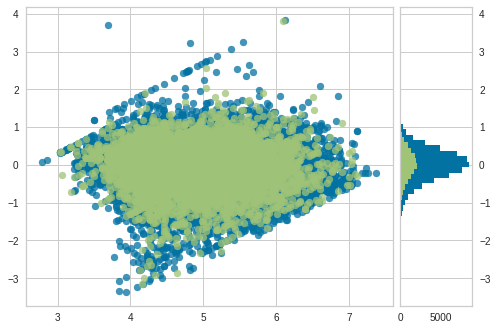

In [96]:
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data

,MAE,MSE,RMSE,RMSE_ratio_test,RMSE_ratio_train,R_2_test,R_2_train
0,0.36,0.23,0.47,0.099,0.1,0.56,0.56


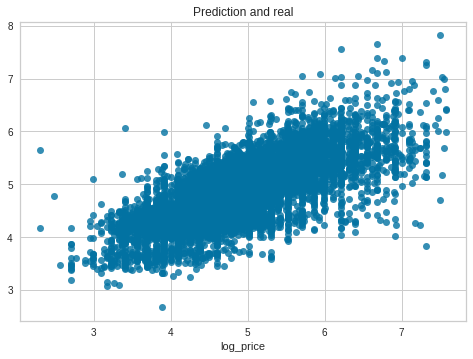

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



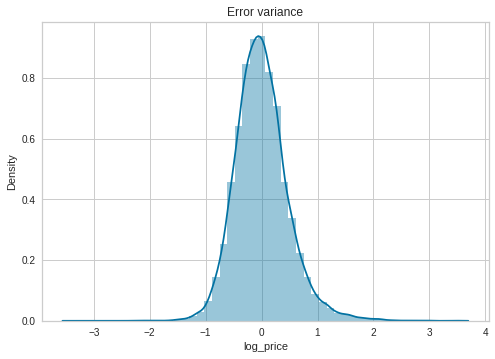

In [99]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from sklearn.naive_bayes import MultinomialNB

model2 = LinearRegression()
model2.fit(X_train, y_train)
analysis(
    model = model2, 
    X_train = X_train,
    X_test = X_val,
    y_train = y_train,
    y_test =  y_val
)
